In [95]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [96]:
data = pd.read_csv('/content/new_train.csv')
data = pd.DataFrame(data)
data.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [97]:
data.describe()

,temp
count,11323.000000
mean,15.573259
std,7.877191
min,-5.110000
25%,8.390000
50%,15.990000
75%,22.055000
max,32.390000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11323 non-null  object 
 1   temp    11323 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.0+ KB


In [99]:
data['date'] = pd.to_datetime(data['date'])



In [100]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data['which_day'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,date,temp,year,month,day,week,which_day,quarter
0,1980-01-01,4.16,1980,1,1,1,1,1
1,1980-02-01,4.06,1980,2,1,5,4,1
2,1980-03-01,7.12,1980,3,1,9,5,1
3,1980-04-01,9.23,1980,4,1,14,1,2
4,1980-05-01,3.20,1980,5,1,18,3,2


In [101]:
data1=data[(data['month']==1) & (data['year']==2010)]

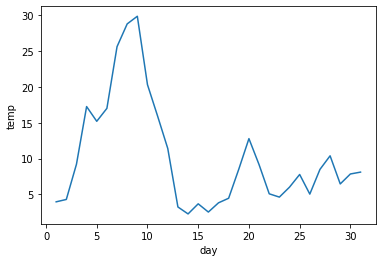

In [102]:
sns.lineplot(x=data1['day'],y=data1['temp'])


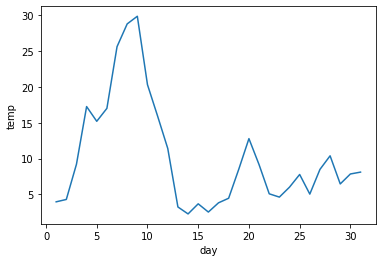

In [103]:
sns.lineplot(x=data1['day'],y=data1['temp'])

In [104]:
data2=data[ (data['year']==2000)]

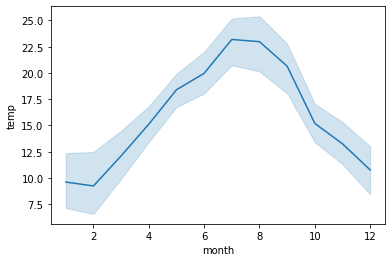

In [105]:
sns.lineplot(x=data2['month'],y=data2['temp'])

In [106]:
maps={1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:0,11:0,12:0}
data['months_map']=data['month'].map(maps)


In [107]:

days=[]
for (i,j) in zip(data['month'],data['day']):
  if(i<=3 and i>=10):
    if(j<=3 and i<15):
      days.append(1)
    else:
      days.append(0)
  else:
    if(j<5):
      days.append(0)
    else:
      days.append(1)
    

In [108]:
data['days']=days

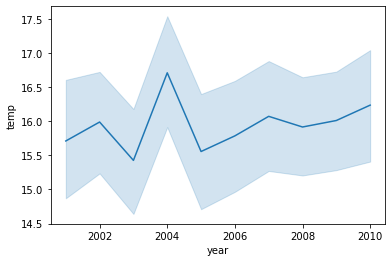

In [109]:
data3=data[data['year']>2000]
sns.lineplot(x=data3['year'],y=data3['temp'])


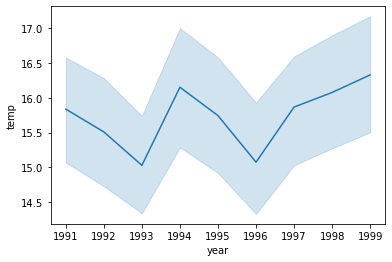

In [110]:
data3=data[(data['year']<2000)&  (data['year']>1990)]
sns.lineplot(x=data3['year'],y=data3['temp'])


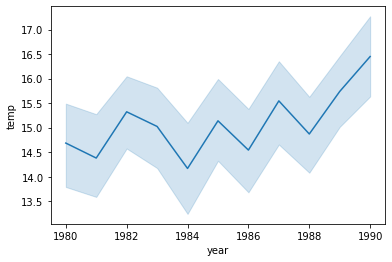

In [111]:
data3=data[(data['year']<=1990)&  (data['year']>=1980)]
sns.lineplot(x=data3['year'],y=data3['temp'])

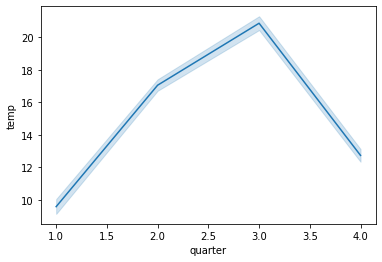

In [112]:
data3=data[(data['year']<=1990)&  (data['year']>=1980)]
sns.lineplot(x=data3['quarter'],y=data3['temp'])

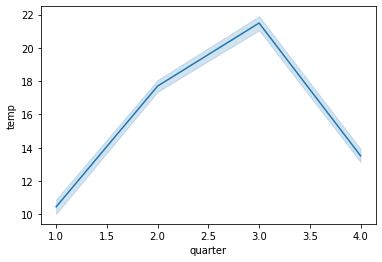

In [113]:
data3=data[(data['year']<=2000)&  (data['year']>=1990)]
sns.lineplot(x=data3['quarter'],y=data3['temp'])

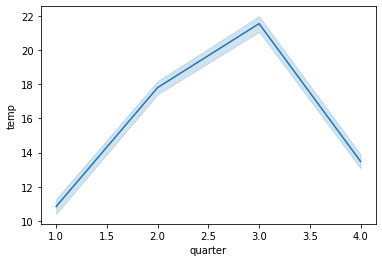

In [114]:
data3=data[data['year']>2000]
sns.lineplot(x=data3['quarter'],y=data3['temp'])


In [116]:
# data[data['quarter']==]

,date,temp,year,month,day,week,which_day,quarter,months_map,days


In [117]:
q_map={1:0,2:1,3:1,4:0}
data['quarter']=data['quarter'].map(q_map)

In [ ]:
data.groupby('year')['temp'].mean()

In [ ]:
data.groupby('quarter')['temp'].mean()

In [ ]:
data.groupby('month')['temp'].mean()

In [ ]:
holder1 = data.groupby('month')['temp'].max()
holder2 = data.groupby('month')['temp'].min()
print("max:", holder1, "\nmin:", holder2)

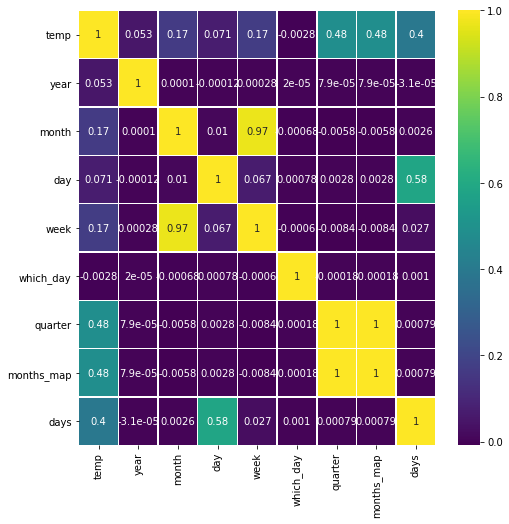

In [118]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [129]:
final_data = data.copy()

In [138]:
final_data1 = final_data.drop(['week', 'which_day'], axis = 1)

In [139]:
final_data2 = final_data.drop(['which_day'], axis = 1)

In [140]:
y = final_data['temp']
x_final2 = final_data1.drop(['temp', 'date'], axis = 1)

x_train ,x_test, Y_train, Y_test = train_test_split(x_final2, y, test_size = 0.2, random_state=0)

In [141]:
y = final_data['temp']
x_final22 = final_data2.drop(['temp', 'date'], axis = 1)

X_train ,X_test, y_train, y_test = train_test_split(x_final22, y, test_size = 0.2, random_state=0)


random_model1 = RandomForestRegressor(n_estimators=500) #max_depth=35)

#Fit
random_model1.fit(X_train, y_train)

y_pred1 = random_model1.predict(X_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(X_train, y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.16 %


In [142]:
random_model_accuracy1 = round(random_model1.score(X_test, y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

93.28 %


In [143]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.029123270115788


In [144]:
random_model1 = RandomForestRegressor(n_estimators=500)
#Fit
random_model1.fit(x_train, Y_train)

y_pred1 = random_model1.predict(x_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(x_train, Y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.19 %


In [145]:
random_model_accuracy1 = round(random_model1.score(x_test, Y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

93.45 %


In [146]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.0038783399439257


## Creating the prediction csv

In [ ]:
test_data = pd.read_csv('/content/new_test.csv')
# test_data = pd.DataFrame(test_data)
test_data.head(1)

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [ ]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['quarter']=test_data['date'].dt.quarter

In [ ]:
maps={1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:0,11:0,12:0}
test_data['months_map']=test_data['month'].map(maps)


In [ ]:
days=[]
for (i,j) in zip(test_data['month'],test_data['day']):
  if(i<=3 and i>=10):
    if(j<=3 and i<15):
      days.append(1)
    else:
      days.append(0)
  else:
    if(j<5):
      days.append(0)
    else:
      days.append(1)

test_data['days']=days

In [147]:
q_map={1:0,2:1,3:1,4:0}
test_data['quarter']=test_data['quarter'].map(q_map)

In [148]:
x_train

,year,month,day,quarter,months_map,days
10089,2007,8,16,1,1,1
476,1981,4,21,1,1,1
2006,1985,6,29,1,1,1
4085,1991,9,3,1,1,0
6680,1998,4,16,1,1,1
...,...,...,...,...,...,...
4859,1993,4,21,1,1,1
3264,1988,8,12,1,1,1
9845,2006,12,15,0,0,1
10799,2009,7,26,1,1,1


In [149]:
test_data1

,year,month,day,quarter,months_map,days
0,2011,1,1,1,0,0
1,2011,2,1,1,0,0
2,2011,3,1,1,0,0
3,2011,4,1,2,1,0
4,2011,5,1,2,1,0
...,...,...,...,...,...,...
3556,2020,9,26,3,1,1
3557,2020,9,27,3,1,1
3558,2020,9,28,3,1,1
3559,2020,9,29,3,1,1


In [150]:
test_data1 = test_data.drop(['date'], axis = 1)

y_pred = random_model1.predict(test_data1)

y_pred

array([ 4.51248,  5.54724,  5.06994, ..., 20.61154, 20.72938, 19.15432])

In [151]:
prediction = pd.Series(y_pred)
prediction.head()

0    4.51248
1    5.54724
2    5.06994
3    5.23328
4    5.24874
dtype: float64

In [153]:
dict = {'Prediction':prediction}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('file.csv') 